In [1]:
import Pkg

# Entire Functions

**$D_{R},C_{R}$  are open disc and circle of radius $R$ centered at origin**

## Jensen's Formula

Let $\Omega$ be an open set that contains the closure of a disc $D_{R}$ and suppose $f$ is holomorphic in $\Omega\,\,$,$f(0)\ne0$, and $f$ vanishes nowhere on the circle $C_{R}$. If $z_{1},z{2},\cdots,z_{n}$ denote the zeros of $f$ inside the disc, then

$$\huge\log|f(0)|=\sum_{k=1}^{N}\log(\frac{|z_{k}|}{R})\,+ \frac{1}{2\pi}\int_{0}^{2\pi}\log|f(R\,e^{i\theta})| d\theta$$


If $f$ is a holomorphic function on the closure of a disk $D_{R}$, we denote $n(r)$ the number of zeros of $f$ inside the disc $D_{r}$, with $0<r<R$ , $n(r)$ is a non-decreasing function of $r$. We claim that if $f(0)\ne0$ and $f$ does not vanish on the circle $C_{R}$,then

$$\huge\int_{0}^{R}n(r)\frac{dr}{r}\,=\,\frac{1}{2\pi}\int_{0}^{2\pi}\log|f(R\,e^{i\theta})|d\theta\,\,-\log|f(0)|$$

## Functions of finite order 

Let $f$ be an entire function. If there exists a positive number $\mathcal{p}$ and constants $A,B>0$ such that

$$\large|f(z)| \le Ae^{B|z|^{\mathcal{p}}}\quad\forall\,\,z\in\mathbb{C}$$

then we say that f has an order of growth $\le\mathcal{p}$. We define the order of growth of $f$ as $\mathcal{p}_{f}=inf_{\mathcal{p}}$, where infimum is overall $p>0$ such that $f$ has an order of growth $\le p$. For example $\large e^{z^{2}}$ has the order of growth $2$.

If $f$ is an entire function that has an order of growth $\le p$, then

- $\large n(r)\le \mathcal{C}_{r}p\quad\exists\mathcal{C}>0$ and all sufficiently large $r$
- If $z_{1},z_{2},\cdots$denote the zeros of $f$,with $z_{k}\ne0$, then $\large\forall s>p\,$ we have

$$\huge\sum_{k=1}^{\infty}\frac{1}{|z_{k}|^{s}}<\infty$$

### Examples

1) $\large f(z)=\dfrac{e^{i\pi z}-e^{-i\pi z}}{2i} \implies |f(z)| \le e^{\pi|z|}$ and $f$ has an order of growth $\le1$. By taking $z=ix,\,x\in\mathbb{R}$ the order of growth of $f$ is $1$. However, $f$ vanishes to order of $\,1\,$ at $\,z=n\quad\forall n\in\mathbb{Z}$ and $\large\sum_{n\ne0}\frac{1}{|n|^{s}} < \infty$ when $s>1$

2) $\large f(z)=\cos z^{1/2}$,which we define by $\large cos z^{1/2}=\sum_{n=0}^{\infty}(-1)^{n}\dfrac{z^{n}}{(2n)!}$. Then $f$ is entire, and it is easy to see that $\large|f(z)|\le e^{|z|^{1/2}}$ and the order of growth of $f$ is $\dfrac{1}{2}$. Moreover $f(z)$ vanishes when $z_{n}=((n+\frac{1}{2})\pi)^{2}$, while $\sum_{n}1/|z_{n}|^{s} < \infty$ exactly when $\large s>\frac{1}{2}$

In [2]:
function fz(z)::Complex
    e = exp(1)
    return (e^(1im*π*z)-e^(-1im*π*z)) / 2im
end

fz (generic function with 1 method)

In [3]:
function cosinez(z)::Complex
    z = z^0.5
    sum = Complex(0,0)
    for i = 0:10
        sum += ((-1)^i)*(z^(i)/factorial(2*i))
    end
    return sum
end

cosinez (generic function with 1 method)

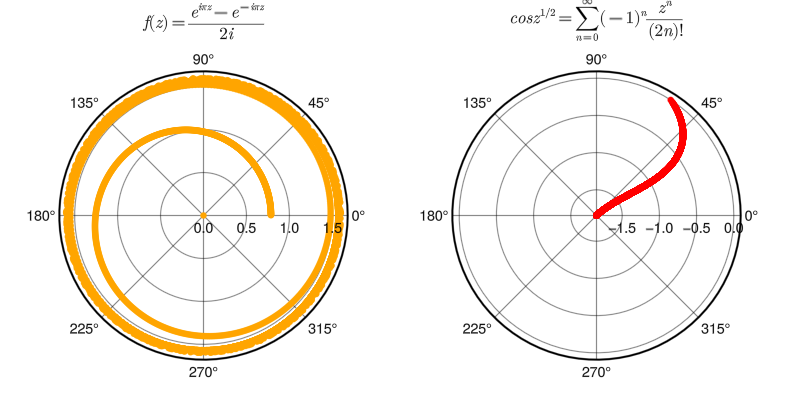

In [4]:

using GLMakie
using LaTeXStrings
r = range(0,10,length=10000)
real_fz = [real.(fz(z)) for z in r]
imag_fz = [imag.(fz(z)) for z in r*1im]
rad = [sqrt(x^2 + y^2) for (x, y) in zip(real_fz, imag_fz)]
θ = [atan(y,x) for (x,y) in zip(real_fz,imag_fz)]
f = Figure(size = (800, 400))

real_cz = [real.(cosinez(z)) for z in r]
imag_cz = [imag.(cosinez(z)) for z in r*1im]
radcz = [sqrt(x^2 + y^2) for (x, y) in zip(real_cz, imag_cz)]
θcz = [atan(y,x) for (x,y) in zip(real_cz,imag_cz)]


ax = PolarAxis(f[1, 1],title = L"""f(z)=\frac{e^{i\pi z}-e^{-i\pi z}}{2i}""",rticklabelsvisible=true)
lineobject = scatter!(ax, rad, θ, color = :orange)

ax = PolarAxis(f[1, 2],title = L"""cos z^{1/2}=\sum_{n=0}^{\infty}(-1)^{n}\frac{z^{n}}{(2n)!}""",rticklabelsvisible=true)
lineobject = scatter!(ax, radcz, θcz, color = :red)
    
f


## Infinite Products

Given a sequence $\left\{a_{n}\right\}_{n=1}^{\infty}$ of complex numbers, we say that the product $\large \prod_{n=1}^{\infty}(1+a_{n})$ converges of the limit 
$$\huge \lim_{N\to\infty}\prod_{n=1}^{\infty}(1+a_{n})$$
of the partial  products **exists**.

Suppose $\left\{F_{n}\right\}$ is a sequence of holomorphic functions on the open set $\Omega$. If $\exists c_{n} > 0$ such that $\sum c_{n} < \infty$ and $|F_{n}(z)-1| \le c_{n}\,\forall z\in\Omega$ then

- The product $\prod_{n=1}^{\infty}F_{n}(z)$ converges uniformly in $\Omega$ to a holomorphic function $F(z)$
- If $F_{n}(z)$ does not vanish $\forall n$ then

$$\huge \dfrac{{F^{\prime}}(z)}{F(z)}=\sum_{n=1}^{\infty}\dfrac{{F^{\prime}}_{n}(z)}{F_{n}(z)}$$

## Weierstrass Infinite Products

Given any sequence $\left\{a_{n}\right\}$ of complex numbers with $|a_{n}|\to\infty$ as $n\to\infty$, there exists an entire function $f$ that vanishes $\forall z=a_{n}$ and nowhere else. Any other such entire function is of the form $\large f(z)e^{g(z)}$, where $g$ is entire.

For each integer $k\ge0$ we define **canonical factors** by

$$\Large E_{0}(z)=1-z\quad\text{and}\quad E_{k}(z)=(1-z)e^{z+\frac{z^{2}}{2}+\cdots+\frac{z^{k}}{k}},\quad\text{for}\quad k\ge1$$

The integer $k$ is called the **degree** of canonical factors.

If $\large|z|\le\frac{1}{2}$, then $\large|1-E_{k}(z)| \le c|z|^{k+1}\quad \exists c>0$

Suppose that we are given a zero of order m at origin, and that $a_{1},a_{2},\cdots$ are all non-zero. Then we define **Weierstrass Product** by

$$\Huge f(z)=e^{g(z)}\prod_{n=1}^{\infty}E_{n}(\frac{z}{a_{n}})$$

where $g(z)$ is an entire function

## Hadamard's factorization theorem

It is a refinement of Weierstrass's factorization theorem

$$\Huge f(z)=e^{g(z)}z^{m}\prod_{n=1}^{\infty}E_{n}(\frac{z}{a_{n}})$$